<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import warnings
import msmexplorer as msme
warnings.filterwarnings('ignore')
import seaborn as sns
%pylab inline
import numpy as np
import os 
import pandas as pd
import mdtraj as md 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)
from msmbuilder.utils import load,dump

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.

Populating the interactive namespace from numpy and matplotlib


In [4]:
feat = load("/home/sbhakat/Plm-TICA-TIP4P-MD/featurizer.pkl")

In [5]:
df = pd.read_pickle("/home/sbhakat/Plm-TICA-TIP4P-MD/feature_descriptor.pkl")

In [6]:
df

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[15, 17, 19, 22]",chi1,Dihedral,sin,[75],[GLU],[76]
1,"[30, 32, 34, 37]",chi1,Dihedral,sin,[76],[MET],[77]
2,"[47, 49, 51, 54]",chi1,Dihedral,sin,[77],[ASN],[78]
3,"[61, 63, 65, 68]",chi1,Dihedral,sin,[78],[TYR],[79]
4,"[82, 84, 86, 88]",chi1,Dihedral,sin,[79],[VAL],[80]
5,"[98, 100, 102, 105]",chi1,Dihedral,sin,[80],[SER],[81]
6,"[116, 118, 120, 126]",chi1,Dihedral,sin,[82],[THR],[83]
7,"[130, 132, 134, 136]",chi1,Dihedral,sin,[83],[VAL],[84]
8,"[146, 148, 150, 153]",chi1,Dihedral,sin,[84],[SER],[85]
9,"[15, 17, 19, 22]",chi1,Dihedral,cos,[75],[GLU],[76]


In [7]:
tica_mdl =load("/home/sbhakat/Plm-TICA-TIP4P-MD/tica_mdl_flapchi1angle.pkl")

In [8]:
tica_mdl

tICA(commute_mapping=False, kinetic_mapping=False, lag_time=10, n_components=5,
     shrinkage=None)

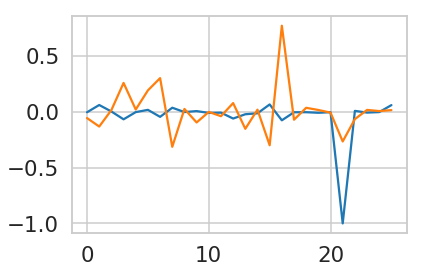

In [9]:
plot(tica_mdl.components_[0])
plot(tica_mdl.components_[1])

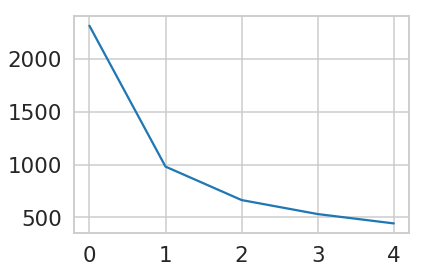

In [10]:
plot(tica_mdl.timescales_)

In [11]:
tica_data = load("/home/sbhakat/Plm-TICA-TIP4P-MD/tica_data.pkl")

In [12]:
import torch
from vde import VDE

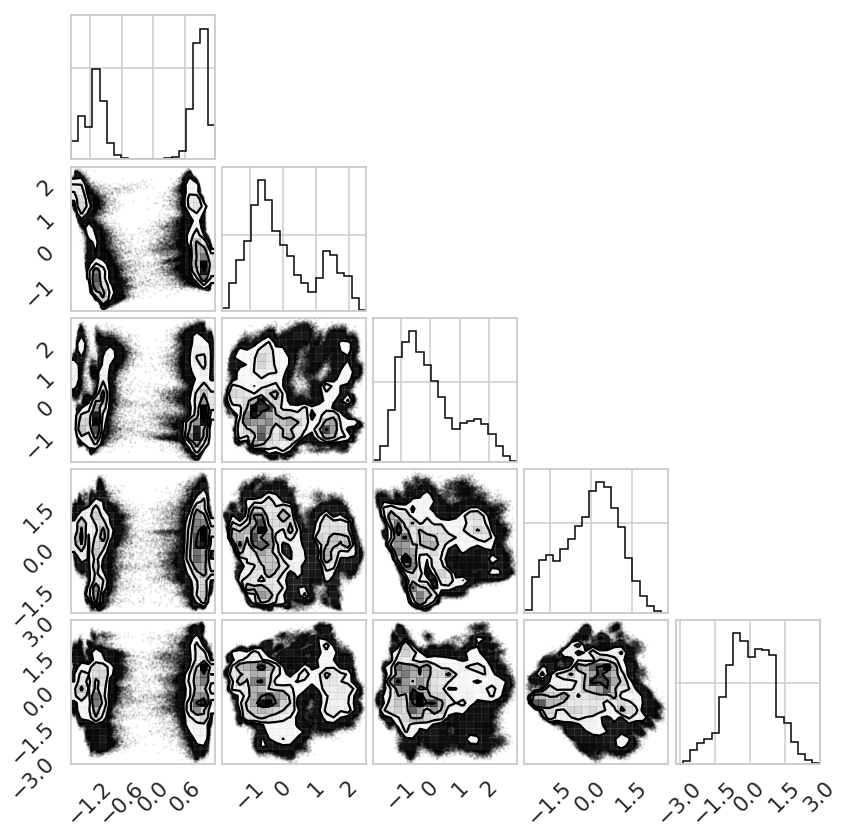

In [13]:
%matplotlib inline
import msmexplorer as msme
import numpy as np
txx = np.concatenate(tica_data)
_ = msme.plot_histogram(txx)

In [14]:
model = VDE(2,lag_time=25,hidden_layer_depth=2,hidden_size=20,n_epochs=100,batch_size=400,learning_rate=1e-2)
model.dtype = torch.DoubleTensor
model.use_cuda =False
model.cpu()
model.double()
model.fit(tica_data)
torch.save(model,"trained_plm.pkl")

Epoch: 0
Batch 100, loss = 0.5473
rec_loss = 0.5309, autocorr_loss = 0.0164
Epoch: 1
Batch 100, loss = 0.5736
rec_loss = 0.5511, autocorr_loss = 0.0225
Epoch: 2
Batch 100, loss = 0.5313
rec_loss = 0.5083, autocorr_loss = 0.0230
Epoch: 3
Batch 100, loss = 0.2371
rec_loss = 0.2139, autocorr_loss = 0.0231
Epoch: 4
Batch 100, loss = 0.2804
rec_loss = 0.2397, autocorr_loss = 0.0407
Epoch: 5
Batch 100, loss = 0.2907
rec_loss = 0.2361, autocorr_loss = 0.0545
Epoch: 6
Batch 100, loss = 0.2387
rec_loss = 0.1836, autocorr_loss = 0.0552
Epoch: 7
Batch 100, loss = 0.2354
rec_loss = 0.2112, autocorr_loss = 0.0242
Epoch: 8
Batch 100, loss = 0.2238
rec_loss = 0.1754, autocorr_loss = 0.0485
Epoch: 9
Batch 100, loss = 0.1878
rec_loss = 0.1572, autocorr_loss = 0.0305
Epoch: 10
Batch 100, loss = 0.2340
rec_loss = 0.1792, autocorr_loss = 0.0548
Epoch: 11
Batch 100, loss = 0.1825
rec_loss = 0.1544, autocorr_loss = 0.0281
Epoch: 12
Batch 100, loss = 0.1728
rec_loss = 0.1491, autocorr_loss = 0.0237
Epoch: 13

In [15]:
from torch.autograd import Variable

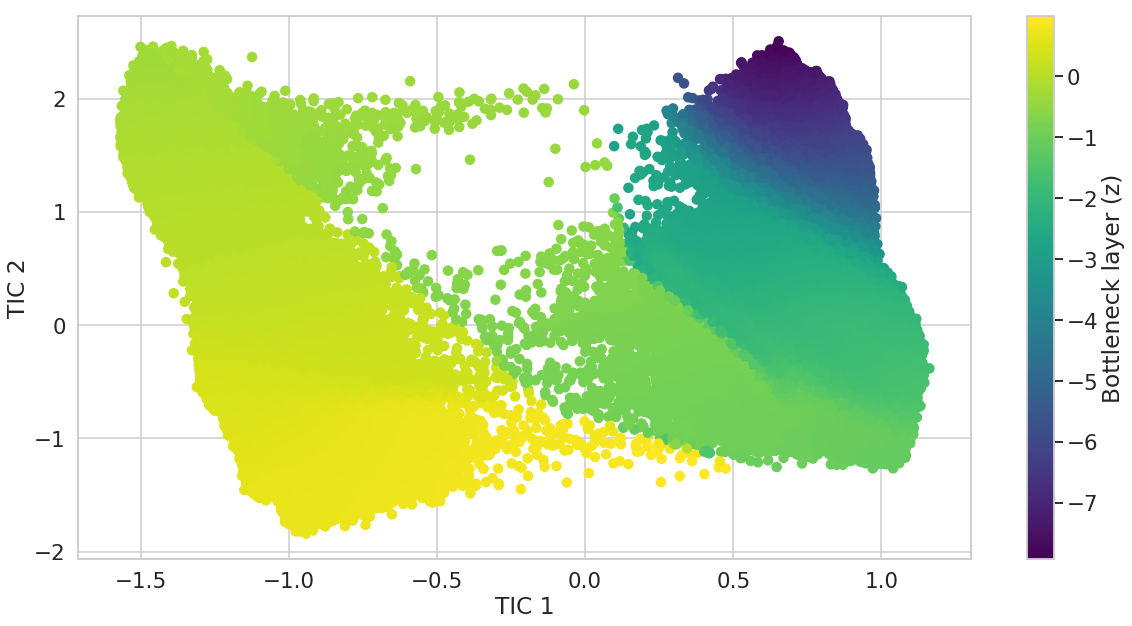

In [16]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
p=scatter(txx[:,0],txx[:,1],c=np.squeeze(output),cmap='viridis')
xlabel("TIC 1")
ylabel("TIC 2")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

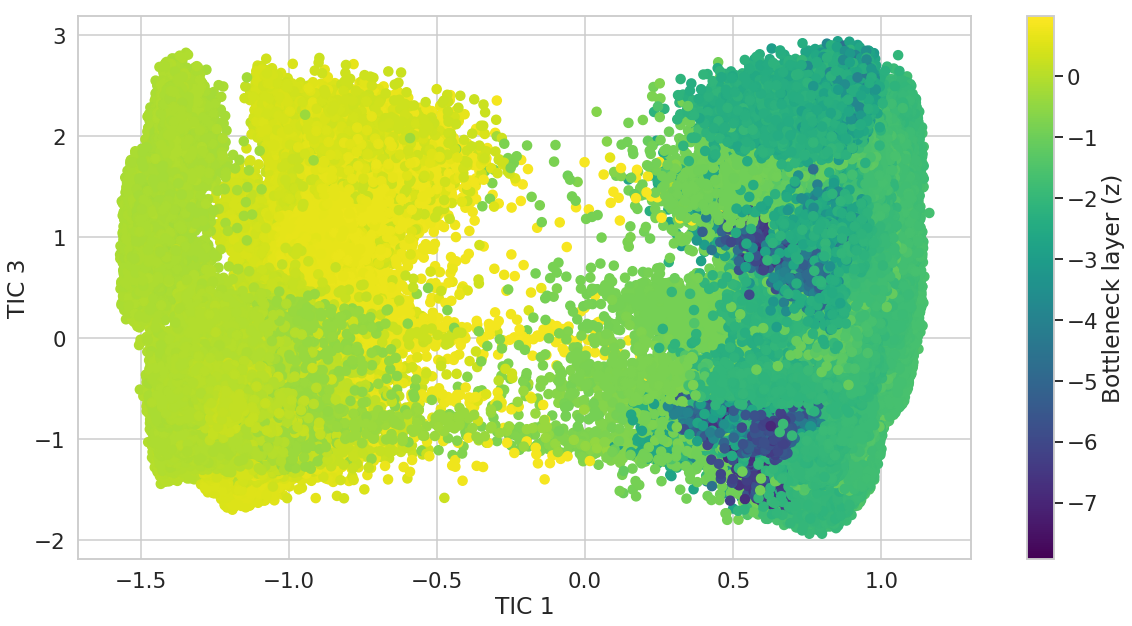

In [17]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
p=scatter(txx[:,0],txx[:,2],c=np.squeeze(output),cmap='viridis')
xlabel("TIC 1")
ylabel("TIC 3")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

Text(0, 0.5, 'Free Energy')

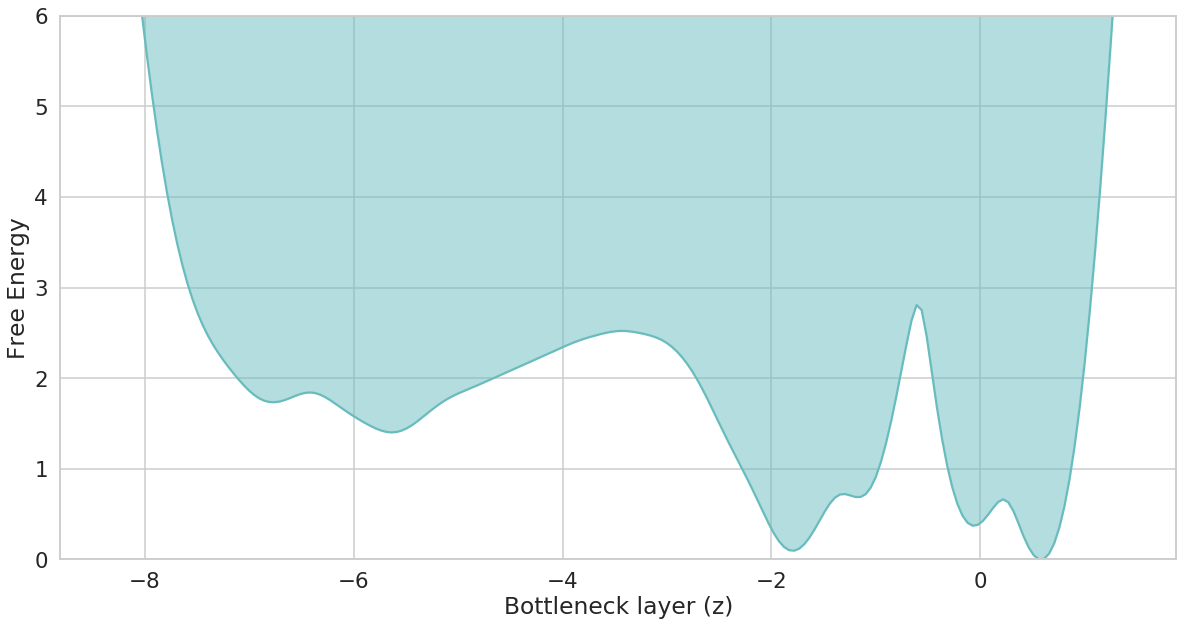

In [25]:
msme.plot_free_energy(output,gridsize=200)
ylim([0,6])
xlabel("Bottleneck layer (z)")
ylabel("Free Energy")

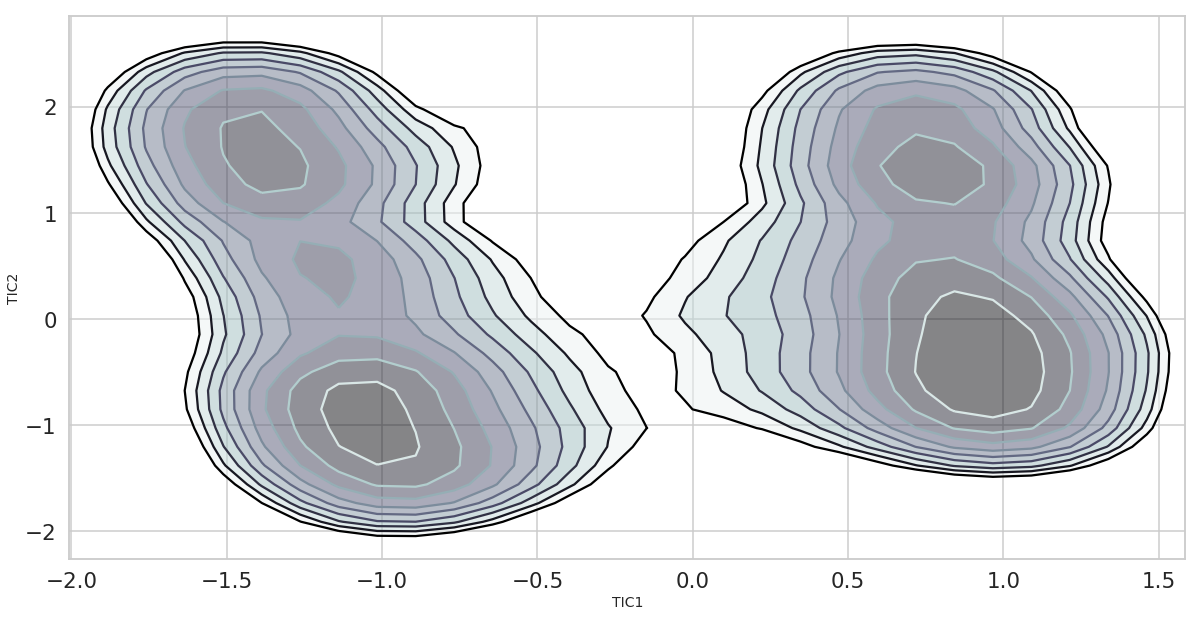

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
msme.plot_free_energy(txx, obs=(0, 1), n_samples=100000,
                      xlabel='TIC1', ylabel='TIC2')

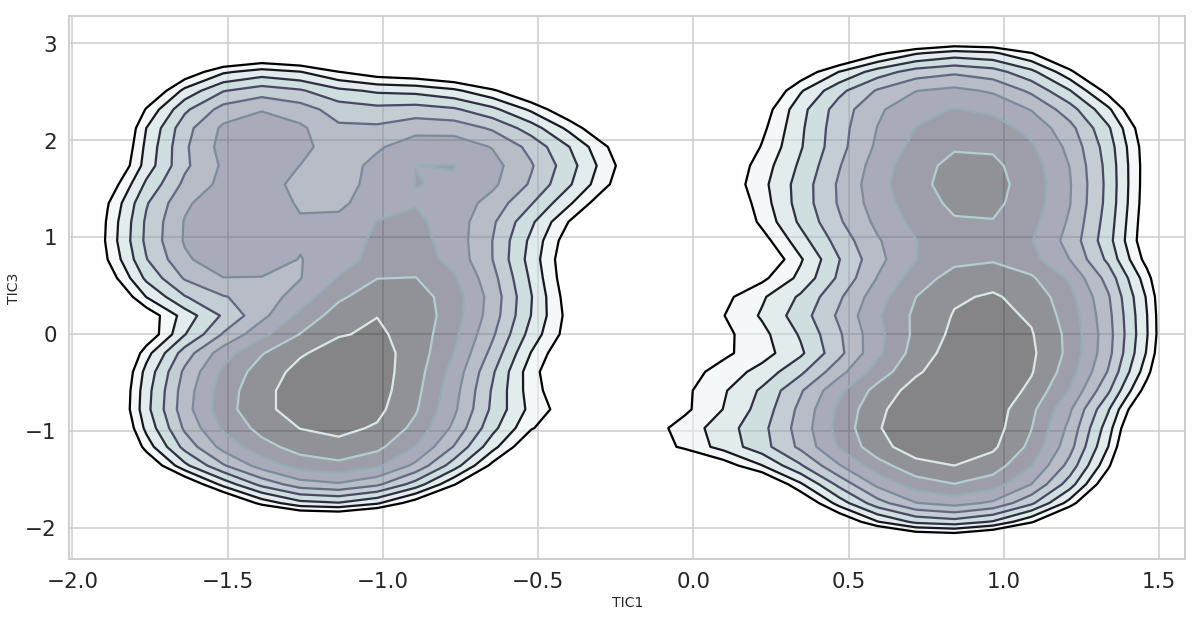

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
msme.plot_free_energy(txx, obs=(0, 2), n_samples=100000,
                      xlabel='TIC1', ylabel='TIC3')

Text(0, 0.5, 'Free Energy')

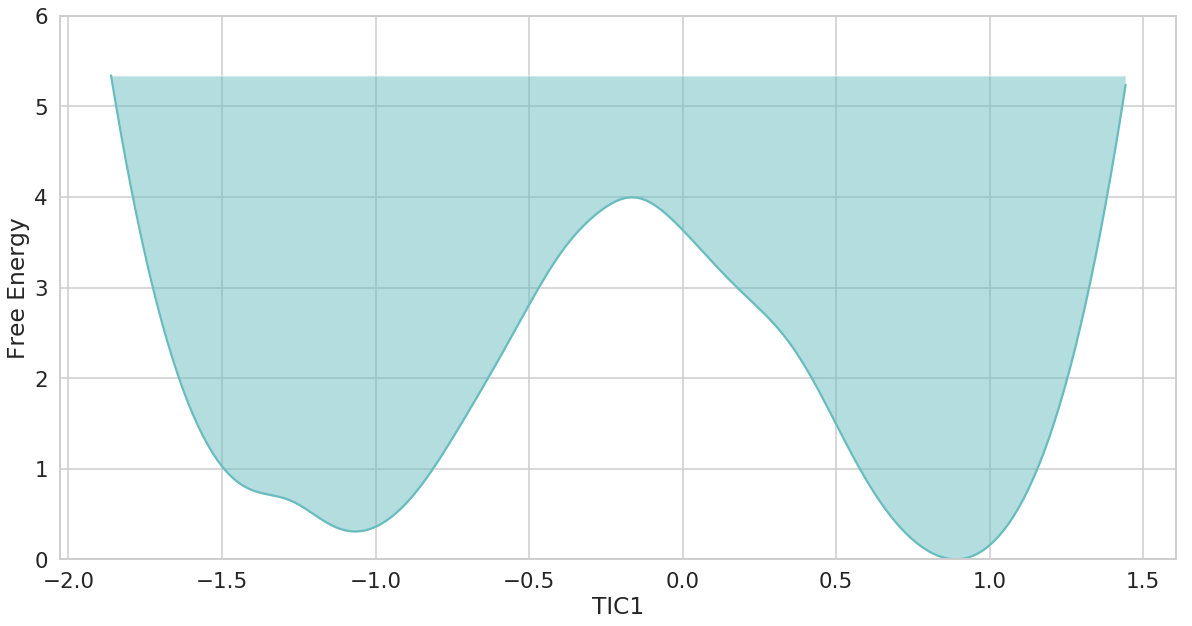

In [21]:
msme.plot_free_energy(txx, obs=(0), n_samples=100000,gridsize=200)
ylim([0,6])
xlabel("TIC1")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

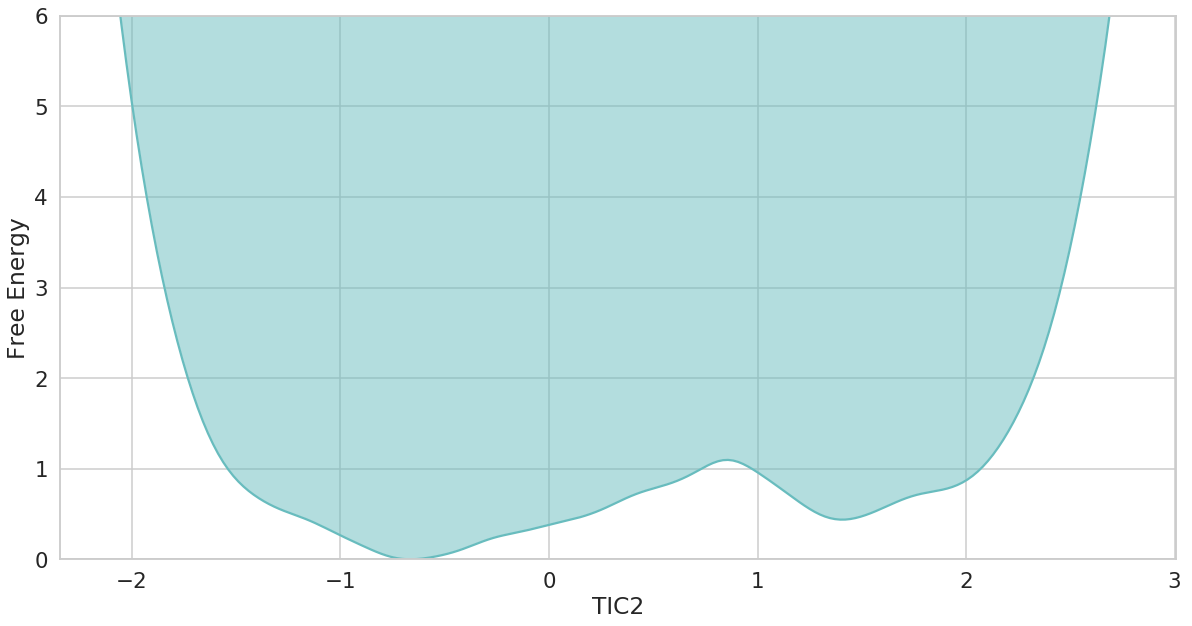

In [26]:
msme.plot_free_energy(txx, obs=(1), n_samples=100000,gridsize=200)
ylim([0,6])
xlabel("TIC2")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

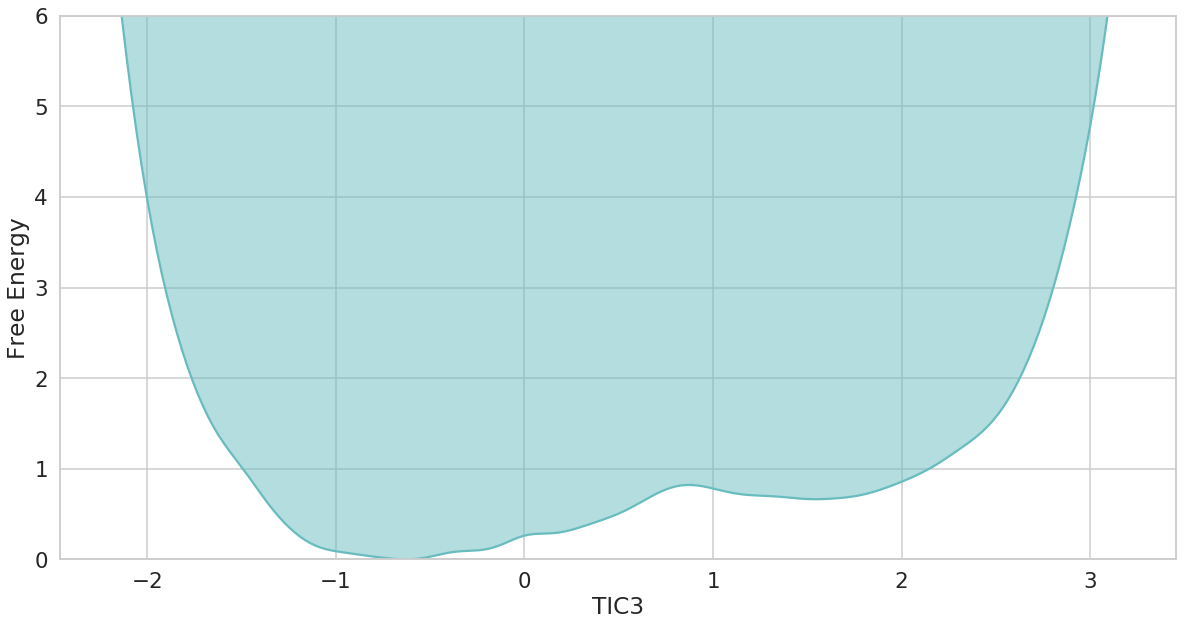

In [27]:
msme.plot_free_energy(txx, obs=(2), n_samples=100000,gridsize=200)
ylim([0,6])
xlabel("TIC3")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

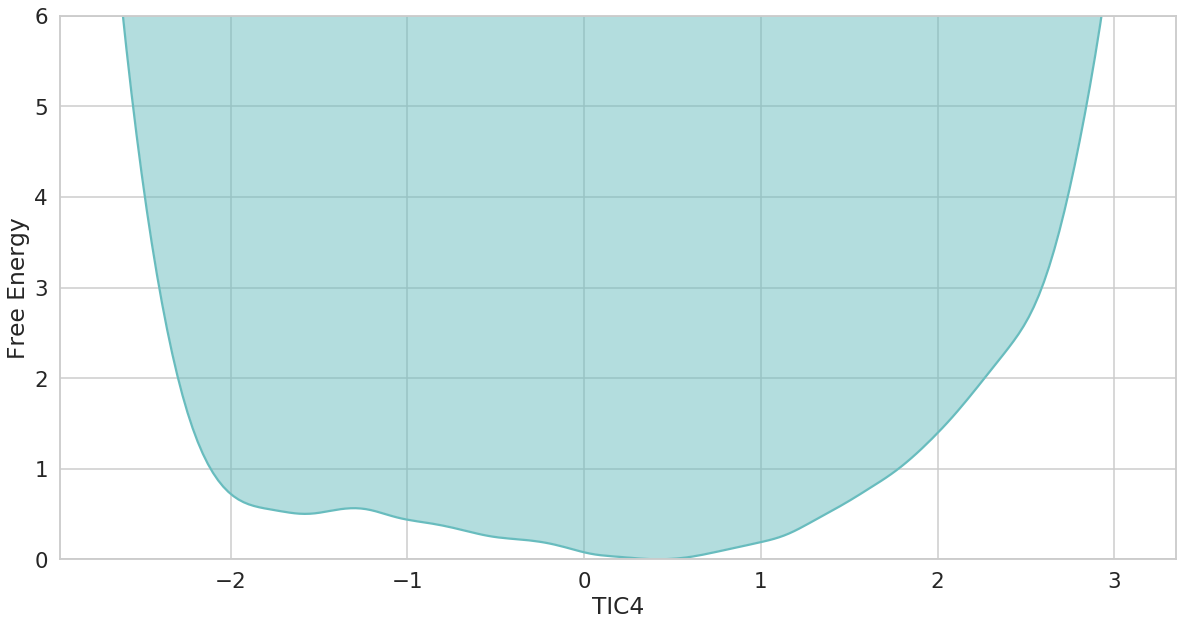

In [28]:
msme.plot_free_energy(txx, obs=(3), n_samples=100000,gridsize=200)
ylim([0,6])
xlabel("TIC4")
ylabel("Free Energy")